## Regresion Logistica para predicciones bancarias

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [83]:
data = pd.read_csv(r"C:\Users\Asus\Desktop\Datasets\datasets\bank\bank.csv", sep=";")

In [84]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [85]:
data.columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [86]:
data.shape

(4119, 21)

In [87]:
data["y"]=(data["y"]== "yes").astype(int)

In [88]:
data.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [89]:
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [90]:
data["education"]= np.where(data["education"] == 'basic.4y' , "Basic" ,data["education"] )
data["education"]= np.where(data["education"] == 'basic.6y' , "Basic" ,data["education"] )
data["education"]= np.where(data["education"] == 'basic.9y' , "Basic" ,data["education"] )
data["education"]= np.where(data["education"] == 'high.school' , "High School" ,data["education"] )
data["education"]= np.where(data["education"] == 'professional.course' , "Professional Course" ,data["education"] )
data["education"]= np.where(data["education"] == 'university.degree' , "University degree" ,data["education"] )
data["education"]= np.where(data["education"] == 'illiterate' , "Illiterate" ,data["education"] )
data["education"]= np.where(data["education"] == 'unknown' , "Unknown" ,data["education"] )

In [91]:
data["education"].unique()

array(['Basic', 'High School', 'University degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [92]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [93]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [94]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0.5, 1.0, 'Frecuencia de compra en funcion del nivel de educacion')

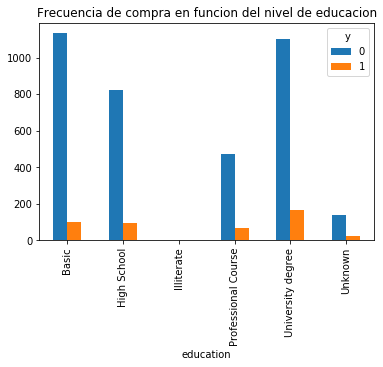

In [95]:
pd.crosstab(data["education"],data["y"]).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")

Text(0.5, 1.0, 'Diagrama apilado de estado civil contra el nivel de compras')

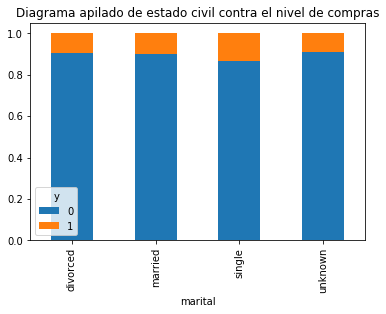

In [96]:
table = pd.crosstab(data["marital"],data["y"])
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked= True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")

Text(0.5, 1.0, 'Diagrama apilado de dia de la semana contra el nivel de compras')

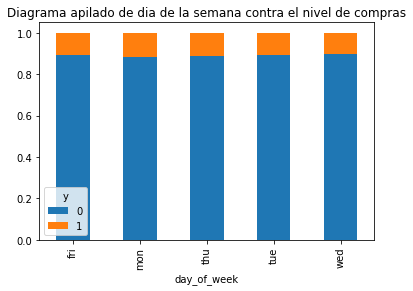

In [97]:
table = pd.crosstab(data["day_of_week"],data["y"])
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked= True)
plt.title("Diagrama apilado de dia de la semana contra el nivel de compras")

Text(0.5, 1.0, 'Diagrama apilado de mes contra el nivel de compras')

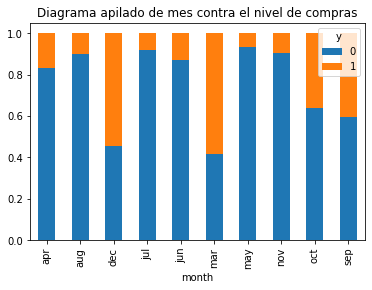

In [98]:
table = pd.crosstab(data["month"],data["y"])
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked= True)
plt.title("Diagrama apilado de mes contra el nivel de compras")

Text(0.5, 1.0, 'Diagrama apilado de mes contra el nivel de compras')

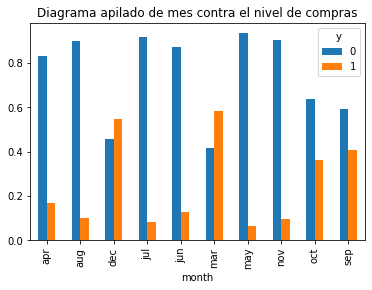

In [99]:
table = pd.crosstab(data["month"],data["y"])
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked= False)
plt.title("Diagrama apilado de mes contra el nivel de compras")

Text(0.5, 1.0, 'Histograma de la edad')

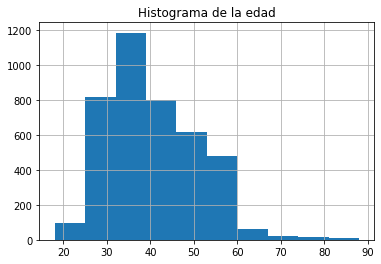

In [100]:
data.age.hist()
plt.title("Histograma de la edad")

Text(0.5, 1.0, 'Frecuencia de compra en funcion de la edad')

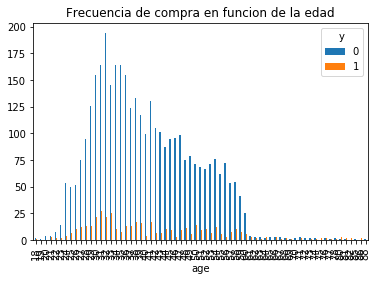

In [101]:
pd.crosstab(data["age"],data["y"]).plot(kind="bar")
plt.title("Frecuencia de compra en funcion de la edad")

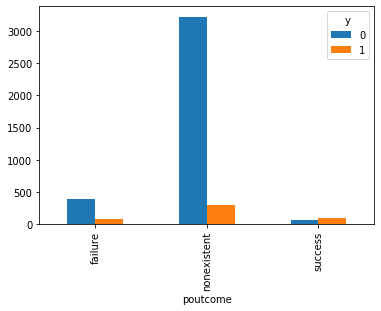

In [102]:
pd.crosstab(data["poutcome"],data["y"]).plot(kind="bar")

### Conversion de variables categoricas a dummies

In [103]:
categories = ["marital","education","default","housing","loan","contact","month","day_of_week","poutcome","job"]

for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummy = pd.get_dummies(data[category],prefix=cat_list)
    data_new= data.join(cat_dummy)
    data=data_new

In [104]:
data_vars = data.columns.values.tolist()

In [105]:
categories = ["marital","education","default","housing","loan","contact","month","day_of_week","poutcome","job"]

In [109]:
#to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in data_vars if v not in ["marital","education","default","housing","loan","contact","month","day_of_week","poutcome","job"]]
#to_keep = [v for v in data_vars if v not in ["job"]]
#to_keep = [v for v in data_vars if v not in ["age"]]
#to_keep = [v for v in data_vars if v not in ["marital"]]
#to_keep = [v for v in data_vars if v not in ["housing"]]
#to_keep = [v for v in data_vars if v not in ["loan"]]
#to_keep = [v for v in data_vars if v not in ["contact"]]
#to_keep = [v for v in data_vars if v not in ["month"]]
#to_keep = [v for v in data_vars if v not in ["day_of_week"]]
#to_keep = [v for v in data_vars if v not in ["poutcome"]]


In [110]:
data_bank = data[to_keep]

In [112]:
data_bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,cat_job_entrepreneur,cat_job_housemaid,cat_job_management,cat_job_retired,cat_job_self-employed,cat_job_services,cat_job_student,cat_job_technician,cat_job_unemployed,cat_job_unknown
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,0,0,0,0,0,0,0,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,0,1,0,0,0,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,1,0,0,0,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,0,0,0,1,0,0,0,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,0,0,0,0,0,0,0


In [113]:
data_bank.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'cat_marital_divorced', 'cat_marital_married',
       'cat_marital_single', 'cat_marital_unknown', 'cat_education_Basic',
       'cat_education_High School', 'cat_education_Illiterate',
       'cat_education_Professional Course',
       'cat_education_University degree', 'cat_education_Unknown',
       'cat_default_no', 'cat_default_unknown', 'cat_default_yes',
       'cat_housing_no', 'cat_housing_unknown', 'cat_housing_yes',
       'cat_loan_no', 'cat_loan_unknown', 'cat_loan_yes',
       'cat_contact_cellular', 'cat_contact_telephone', 'cat_month_apr',
       'cat_month_aug', 'cat_month_dec', 'cat_month_jul', 'cat_month_jun',
       'cat_month_mar', 'cat_month_may', 'cat_month_nov', 'cat_month_oct',
       'cat_month_sep', 'cat_day_of_week_fri', 'cat_day_of_week_mon',
       'cat_day_of_week_thu', 'cat_day_of_week_tue',
       '

In [114]:
data_bank_columns = data_bank.columns.values.tolist()
y = ["y"]
x = [v for v in data_bank_columns if v not in y]

## Seleccion de rasgos para el modelo

In [115]:
n = 12

In [116]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [117]:
lr = LogisticRegression()

In [118]:
rfe = RFE(lr,n)
rfe = rfe.fit(data_bank[x],data_bank[y].values.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [119]:
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True False False  True False False False  True False False False False
 False]


In [120]:
print(rfe.ranking_)

[37 43 18 44  1 14 30 29  1 42 19 38 33 50 31 13 48 22 34  8 39 36 49 20
  9 10 15  6 24 16  4 45 25  1  1  1  1  1 17  1 47 26 21 28 27 11  1  7
  1 23  3  1 40  2 41  1  5 32 35 12 46]


In [124]:
z = zip(data_bank_columns,rfe.support_,rfe.ranking_)

In [125]:
list(z)

[('age', False, 37),
 ('duration', False, 43),
 ('campaign', False, 18),
 ('pdays', False, 44),
 ('previous', True, 1),
 ('emp.var.rate', False, 14),
 ('cons.price.idx', False, 30),
 ('cons.conf.idx', False, 29),
 ('euribor3m', True, 1),
 ('nr.employed', False, 42),
 ('y', False, 19),
 ('cat_marital_divorced', False, 38),
 ('cat_marital_married', False, 33),
 ('cat_marital_single', False, 50),
 ('cat_marital_unknown', False, 31),
 ('cat_education_Basic', False, 13),
 ('cat_education_High School', False, 48),
 ('cat_education_Illiterate', False, 22),
 ('cat_education_Professional Course', False, 34),
 ('cat_education_University degree', False, 8),
 ('cat_education_Unknown', False, 39),
 ('cat_default_no', False, 36),
 ('cat_default_unknown', False, 49),
 ('cat_default_yes', False, 20),
 ('cat_housing_no', False, 9),
 ('cat_housing_unknown', False, 10),
 ('cat_housing_yes', False, 15),
 ('cat_loan_no', False, 6),
 ('cat_loan_unknown', False, 24),
 ('cat_loan_yes', False, 16),
 ('cat_cont

In [126]:
cols = ['previous','euribor3m','cat_month_aug','cat_month_dec','cat_month_jul','cat_month_jun','cat_month_mar','cat_month_nov','cat_day_of_week_wed',
       'cat_poutcome_nonexistent','cat_job_blue-collar','cat_job_retired']

In [131]:
x = data_bank[cols]
y = data_bank["y"]

## Implementacion del modelo en Python con statsmodels.api

In [132]:
import statsmodels.api as sm

In [133]:
logit_model = sm.Logit(y,x)

In [134]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [135]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.155     
Dependent Variable:     y                  AIC:                2427.6025 
Date:                   2021-03-26 15:03   BIC:                2503.4828 
No. Observations:       4119               Log-Likelihood:     -1201.8   
Df Model:               11                 LL-Null:            -1422.9   
Df Residuals:           4107               LLR p-value:        6.4492e-88
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
previous                 -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m                -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
cat_month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
cat_month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
cat_month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
cat_month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
cat_month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
cat_month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
cat_day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
cat_poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
cat_job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
cat_job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
=========================================================================

"""

## Implementacion del modelo en Python con Scikit-Learn

In [136]:
from sklearn import linear_model

In [137]:
logit_model = linear_model.LogisticRegression()

In [138]:
logit_model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
logit_model.score(x,y)

0.8963340616654528

In [140]:
1-y.mean()

0.8905074047098811

In [141]:
pd.DataFrame(list(zip(x.columns,np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571352913313]
1,euribor3m,[-0.5464961352433506]
2,cat_month_aug,[0.6253983085382243]
3,cat_month_dec,[1.1822172985949213]
4,cat_month_jul,[0.9622633626170513]
5,cat_month_jun,[1.0543179247547083]
6,cat_month_mar,[1.6306366297729475]
7,cat_month_nov,[0.4519576817474784]
8,cat_day_of_week_wed,[0.04171433839730718]
9,cat_poutcome_nonexistent,[0.3056987706307794]


## Validacion del modelo logistico

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state=0)

In [146]:
lm = linear_model.LogisticRegression()

In [147]:
lm.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
probs = lm.predict_proba(x_test)

In [151]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044409, 0.34955591],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

In [152]:
prediction= lm.predict(x_test)

In [153]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [154]:
prob = probs[:,1]
prob = pd.DataFrame(prob)
threshold = 0.1
prob["Probabilidad"] = np.where(prob[0]>threshold, 1, 0 )
prob

,0,Probabilidad
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0
...,...,...
1231,0.062144,0
1232,0.062079,0
1233,0.349556,1
1234,0.026165,0


In [156]:
pd.crosstab(prob.Probabilidad, columns="count")

col_0,count
Probabilidad,
0,846
1,390


In [157]:
390/len(prob)

0.3155339805825243

In [158]:
prob = probs[:,1]
prob = pd.DataFrame(prob)
threshold = 0.15
prob["Probabilidad"] = np.where(prob[0]>threshold, 1, 0 )
prob

,0,Probabilidad
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0
...,...,...
1231,0.062144,0
1232,0.062079,0
1233,0.349556,1
1234,0.026165,0


In [159]:
pd.crosstab(prob.Probabilidad, columns="count")

col_0,count
Probabilidad,
0,905
1,331


In [160]:
331/len(prob)

0.26779935275080907

In [161]:
from sklearn import metrics

In [163]:
metrics.accuracy_score(y_test,prediction)

0.9004854368932039

## Validacion cruzada

In [166]:
from sklearn.model_selection import cross_val_score

In [172]:
scores = cross_val_score(linear_model.LogisticRegression(),x,y ,scoring="accuracy", cv = 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [173]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

In [174]:
scores.mean()

0.8943884240990478

## Matrices de confusion y curvas ROC

In [181]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=0)

In [182]:
lm = linear_model.LogisticRegression()

In [183]:
lm.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
probs = lm.predict_proba(x_test)

In [187]:
prob = probs[:,1]
prob = pd.DataFrame(prob)
threshold = 0.1
prob["Prediction"] = np.where(prob[0]>threshold, 1, 0 )
prob["actual"] = list(y_test)
prob

,0,Prediction,actual
0,0.045371,0,0
1,0.162373,1,0
2,0.067554,0,0
3,0.062144,0,0
4,0.041582,0,0
...,...,...,...
1231,0.062144,0,0
1232,0.062079,0,0
1233,0.349556,1,0
1234,0.026165,0,0


In [189]:
confusion_matrix = pd.crosstab(prob.Prediction, prob.actual)

In [190]:
confusion_matrix

actual,0,1
Prediction,,
0,806,40
1,308,82


In [191]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[0][1]
FP = confusion_matrix[1][0]

In [194]:
sens = TP/(TP+FN)

In [195]:
sens

0.21025641025641026

In [196]:
espc_1 = 1 - TN/(TN+FP)

In [197]:
espc_1

0.047281323877068515

In [223]:
thresholds = [0.04,0.05,0.07,0.1,0.12,0.15,0.18,0.2,0.25,0.3,0.4,0.5]
sensibilities = [1]
especifities = [1]

for t in thresholds:
    prob["Prediction"] = np.where(prob[0]>t, 1, 0 )
    prob["actual"] = list(y_test)
    prob.head()
    confusion_matrix = pd.crosstab(prob.Prediction, prob.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = TP/(TP+FN)
    sensibilities.append(sens)
    espc_1 = 1 - TN/(TN+FP)
    especifities.append(espc_1)
    
sensibilities.append(0)
especifities.append(0)

In [224]:
sensibilities

[1,
 0.9344262295081968,
 0.8442622950819673,
 0.680327868852459,
 0.6721311475409836,
 0.6639344262295082,
 0.6475409836065574,
 0.5163934426229508,
 0.45901639344262296,
 0.4016393442622951,
 0.36065573770491804,
 0.1721311475409836,
 0.11475409836065574,
 0]

In [225]:
especifities

[1,
 0.7782764811490126,
 0.5646319569120287,
 0.2989228007181328,
 0.2764811490125674,
 0.24596050269299818,
 0.22621184919210058,
 0.12387791741472176,
 0.1077199281867145,
 0.07181328545780974,
 0.06463195691202872,
 0.02333931777378817,
 0.013464991023339312,
 0]

In [226]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CURVA ROC')

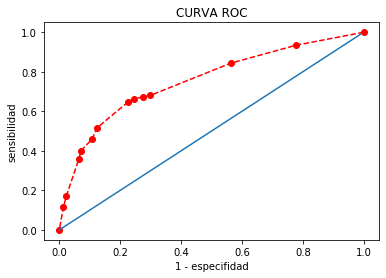

In [227]:
plt.plot(especifities, sensibilities, marker = "o", linestyle="--", color="red")
x= [i*0.01 for i in range(100)]
y= [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1 - especifidad")
plt.ylabel("sensibilidad")
plt.title("CURVA ROC")

In [230]:
from sklearn import metrics